In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import metrics
import statsmodels.api as sm
from sklearn.feature_selection import chi2
from sklearn.metrics import roc_auc_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.preprocessing import MinMaxScaler
from sklearn import tree
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV, KFold
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_score

In [5]:
!pip3 install 'pyreadstat'

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.8/2.8 MB 9.1 MB/s eta 0:00:00


In [6]:
df=pd.read_spss("/content/Age at early Marriage.sav")

In [7]:
df.head()

,Respondent_current_age,Division,Types_of_place_of_residence,Highest_educational_level,Religion,Literacy,Husband_desire_for_children,Exposure,Husband_education_level,Respondent_currently_working,Weath_index_combined,Age_at_first_birth,Current_contraceptive_method,Ideal_number_of_children,Husband_age,Age_at_first_marriage,Occupation_of_husband
0,46-49,Barisal,Urban,Secondary,Islam,can not read at all,Husband wants fewer,Fecund,Primary,No,Middle,12-20,Traditional Method,2 or less,17-30,Early marriage,Proffesional
1,46-49,Sylhet,Rural,No education,Islam,can not read at all,Don't know,Fecund,Primary,No,Richer,12-20,No Method,2 or less,31-50,Early marriage,Did not work
2,46-49,Sylhet,Rural,Primary,Islam,can not read at all,Husband wants fewer,Fecund,Primary,No,Richer,12-20,Traditional Method,3 or more,31-50,Late marriage,Did not work
3,46-49,Barisal,Rural,Higher,Islam,can not read at all,Both want same,Fecund,Higher,No,Richest,12-20,Traditional Method,2 or less,31-50,Early marriage,Did not work
4,46-49,Rajshahi,Urban,No education,Islam,can not read at all,Both want same,Fecund,No education,Yes,Richer,12-20,No Method,2 or less,31-50,Early marriage,Did not work


In [8]:
# df_csv is an object of pandas's class and the isnull , Sum is the method under the class
df.isnull().sum()

Respondent_current_age          0
Division                        0
Types_of_place_of_residence     0
Highest_educational_level       0
Religion                        0
Literacy                        0
Husband_desire_for_children     0
Exposure                        0
Husband_education_level         0
Respondent_currently_working    0
Weath_index_combined            0
Age_at_first_birth              0
Current_contraceptive_method    0
Ideal_number_of_children        0
Husband_age                     0
Age_at_first_marriage           0
Occupation_of_husband           0
dtype: int64

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15943 entries, 0 to 15942
Data columns (total 17 columns):
 #   Column                        Non-Null Count  Dtype   
---  ------                        --------------  -----   
 0   Respondent_current_age        15943 non-null  category
 1   Division                      15943 non-null  category
 2   Types_of_place_of_residence   15943 non-null  category
 3   Highest_educational_level     15943 non-null  category
 4   Religion                      15943 non-null  category
 5   Literacy                      15943 non-null  category
 6   Husband_desire_for_children   15943 non-null  category
 7   Exposure                      15943 non-null  category
 8   Husband_education_level       15943 non-null  category
 9   Respondent_currently_working  15943 non-null  category
 10  Weath_index_combined          15943 non-null  category
 11  Age_at_first_birth            15943 non-null  category
 12  Current_contraceptive_method  15943 non-null  

In [10]:
df.duplicated().sum()

1251

In [11]:
df.drop_duplicates(inplace=True)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14692 entries, 0 to 15941
Data columns (total 17 columns):
 #   Column                        Non-Null Count  Dtype   
---  ------                        --------------  -----   
 0   Respondent_current_age        14692 non-null  category
 1   Division                      14692 non-null  category
 2   Types_of_place_of_residence   14692 non-null  category
 3   Highest_educational_level     14692 non-null  category
 4   Religion                      14692 non-null  category
 5   Literacy                      14692 non-null  category
 6   Husband_desire_for_children   14692 non-null  category
 7   Exposure                      14692 non-null  category
 8   Husband_education_level       14692 non-null  category
 9   Respondent_currently_working  14692 non-null  category
 10  Weath_index_combined          14692 non-null  category
 11  Age_at_first_birth            14692 non-null  category
 12  Current_contraceptive_method  14692 non-null  

# Feature Engineering

# Encoding

In [13]:
for i in df.columns:
   a=df[i].nunique()
   print(i,    a)


Respondent_current_age 7
Division 8
Types_of_place_of_residence 2
Highest_educational_level 4
Religion 4
Literacy 3
Husband_desire_for_children 4
Exposure 4
Husband_education_level 5
Respondent_currently_working 2
Weath_index_combined 5
Age_at_first_birth 3
Current_contraceptive_method 3
Ideal_number_of_children 2
Husband_age 3
Age_at_first_marriage 2
Occupation_of_husband 2


Ordinal Encoding : 11 columns

Highest_educational_level,
Literacy,
Husband_education_level,
Respondent_currently_working,
Weath_index_combined,
Occupation_of_husband ,
Ideal_number_of_children ,
Occupation_of_husband,
Husband_age,
Respondent_current_age



One hot encoding : 6 columns

Division ,

Types_of_place_of_residence  ,
Religion ,  

Husband_desire_for_children ,

Exposure  ,

Current_contraceptive_method ,


Label Encoding: 1 column

Age_at_first_marriage

In [14]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import LabelEncoder

# Ordinal Encoding

In [15]:
# Separate features and target
X= df.drop('Age_at_first_marriage', axis=1)
y = df['Age_at_first_marriage']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [16]:
df.Occupation_of_husband.unique()

['Proffesional', 'Did not work']
Categories (2, object): ['Did not work', 'Proffesional']

In [17]:
# Ordinalencoding ->
oe = OrdinalEncoder(categories=[['No education','Primary','Secondary','Higher'],['can not read at all', 'Able to read only parts of sentence', 'Able to read Whole sentence'],[ 'Don\'t know','No education','Primary','Secondary','Higher'],['No', 'Yes'],[ 'Poorer', 'Poorest','Middle', 'Richer', 'Richest',],['2 or less', '3 or more'],['Proffesional', 'Did not work'],['17-30', '31-50', 'more than 50'],['46-49', '41-45', '36-40', '31-35', '26-30', '21-25', '15-20']]).set_output(transform='pandas')
X_train_cough = oe.fit_transform(X_train[['Highest_educational_level','Literacy','Husband_education_level','Respondent_currently_working','Weath_index_combined','Ideal_number_of_children','Occupation_of_husband','Husband_age','Respondent_current_age']])

# also the test data
X_test_cough = oe.fit_transform(X_test[['Highest_educational_level','Literacy','Husband_education_level','Respondent_currently_working','Weath_index_combined','Ideal_number_of_children','Occupation_of_husband','Husband_age','Respondent_current_age']])

X_train_cough

,Highest_educational_level,Literacy,Husband_education_level,Respondent_currently_working,Weath_index_combined,Ideal_number_of_children,Occupation_of_husband,Husband_age,Respondent_current_age
11459,1.0,2.0,2.0,0.0,3.0,0.0,0.0,1.0,5.0
13156,2.0,2.0,4.0,1.0,2.0,0.0,0.0,2.0,5.0
771,2.0,0.0,2.0,1.0,4.0,0.0,0.0,1.0,0.0
8249,1.0,2.0,2.0,1.0,1.0,1.0,0.0,1.0,4.0
3828,2.0,0.0,2.0,1.0,0.0,0.0,1.0,1.0,2.0
...,...,...,...,...,...,...,...,...,...
5525,2.0,1.0,2.0,0.0,1.0,0.0,0.0,0.0,3.0
14571,2.0,2.0,1.0,1.0,0.0,1.0,0.0,1.0,6.0
5726,2.0,1.0,2.0,1.0,0.0,0.0,1.0,1.0,3.0
901,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0


# One hot encoding

In [18]:
# OneHotEncoding -> Division ,  Types_of_place_of_residence  ,Religion ,  Husband_desire_for_children ,  Exposure  , Current_contraceptive_method ,

ohe = OneHotEncoder(drop='first',sparse_output=False).set_output(transform='pandas')
X_train_gender_city = ohe.fit_transform(X_train[['Division','Types_of_place_of_residence','Religion','Husband_desire_for_children','Exposure','Current_contraceptive_method']])

# also the test data
X_test_gender_city = ohe.fit_transform(X_test[['Division','Types_of_place_of_residence','Religion','Husband_desire_for_children','Exposure','Current_contraceptive_method']])

X_train_gender_city

,Division_Chittagong,Division_Dhaka,Division_Khulna,Division_Mymensingh,Division_Rajshahi,Division_Rangpur,Division_Sylhet,Types_of_place_of_residence_Urban,Religion_Christianity,Religion_Hinduism,Religion_Islam,Husband_desire_for_children_Don't know,Husband_desire_for_children_Husband wants fewer,Husband_desire_for_children_Husband wants more,"Exposure_Infecund, menopausal",Exposure_Postpartum amenorrheic,Exposure_Pregnant,Current_contraceptive_method_No Method,Current_contraceptive_method_Traditional Method
11459,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
13156,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
771,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
8249,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3828,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5525,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
14571,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
5726,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
901,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


# Label encoding

In [19]:
# 0-Early
# 1-Late

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le.fit(y_train)
le.classes_

array(['Early marriage', 'Late marriage'], dtype=object)

In [20]:
y_train = le.transform(y_train)
y_test = le.transform(y_test)
y_train=pd.DataFrame(y_train)
y_test=pd.DataFrame(y_test)

# Concate the Columns

In [21]:
x_train=pd.concat([X_train_cough,X_train_gender_city],axis=1)
x_test=pd.concat([X_test_cough,X_test_gender_city],axis=1)

# Making DataFrame

In [22]:
total_X=pd.concat([x_train,x_test])
total_y=pd.concat([y_train,y_test])
total_y.rename(columns = {0:'Age at Early Marrige'}, inplace = True)

In [23]:
total_y.info()
total_X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14692 entries, 0 to 2938
Data columns (total 1 columns):
 #   Column                Non-Null Count  Dtype
---  ------                --------------  -----
 0   Age at Early Marrige  14692 non-null  int64
dtypes: int64(1)
memory usage: 229.6 KB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 14692 entries, 11459 to 11451
Data columns (total 28 columns):
 #   Column                                           Non-Null Count  Dtype  
---  ------                                           --------------  -----  
 0   Highest_educational_level                        14692 non-null  float64
 1   Literacy                                         14692 non-null  float64
 2   Husband_education_level                          14692 non-null  float64
 3   Respondent_currently_working                     14692 non-null  float64
 4   Weath_index_combined                             14692 non-null  float64
 5   Ideal_number_of_children                  

In [24]:
total_y.value_counts()

Age at Early Marrige
0                       12498
1                        2194
dtype: int64

# Oversampling

In [25]:
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
X_before_oversampled_train, X_before_oversampled_test, y_before_oversampled_train, y_before_oversampled_test = train_test_split(total_X,total_y, test_size=0.3, random_state=0)

In [26]:
X_before_oversampled_train

,Highest_educational_level,Literacy,Husband_education_level,Respondent_currently_working,Weath_index_combined,Ideal_number_of_children,Occupation_of_husband,Husband_age,Respondent_current_age,Division_Chittagong,...,Religion_Hinduism,Religion_Islam,Husband_desire_for_children_Don't know,Husband_desire_for_children_Husband wants fewer,Husband_desire_for_children_Husband wants more,"Exposure_Infecund, menopausal",Exposure_Postpartum amenorrheic,Exposure_Pregnant,Current_contraceptive_method_No Method,Current_contraceptive_method_Traditional Method
3594,1.0,0.0,2.0,1.0,0.0,0.0,0.0,0.0,2.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2797,1.0,0.0,2.0,1.0,3.0,0.0,0.0,1.0,1.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
9061,2.0,2.0,3.0,0.0,3.0,0.0,0.0,0.0,4.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
486,1.0,0.0,3.0,0.0,3.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3457,2.0,0.0,2.0,0.0,2.0,0.0,0.0,1.0,2.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10767,0.0,2.0,3.0,1.0,3.0,0.0,0.0,2.0,4.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1899,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
8183,2.0,2.0,3.0,0.0,1.0,0.0,0.0,1.0,4.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
11804,3.0,2.0,2.0,1.0,2.0,0.0,0.0,0.0,5.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [27]:
import imblearn.over_sampling as sm

# Assuming your data is already preprocessed
X_train = X_before_oversampled_train.astype('int')
y_train = y_before_oversampled_train

# Create an SMOTE instance with a random seed for reproducibility
smo = sm.SMOTE(random_state=2)

# Oversample the data using SMOTE
X_train_oversampled, y_train_oversampled=smo.fit_resample(X_train, y_train)

In [28]:
print('After OverSampling, the shape of train_X: {}'.format(X_train_oversampled.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_oversampled.shape))

print("After OverSampling, counts of label '1': {}".format(np.sum(y_train_oversampled == 1)))
print("After OverSampling, counts of label '0': {}".format(np.sum(y_train_oversampled == 1)))

After OverSampling, the shape of train_X: (17514, 28)
After OverSampling, the shape of train_y: (17514, 1) 

After OverSampling, counts of label '1': Age at Early Marrige    8757
dtype: int64
After OverSampling, counts of label '0': Age at Early Marrige    8757
dtype: int64


# Multicolinearity

In [29]:
X_Feature_Selection=total_X
y_Feature_Selection=total_y
y_Feature_Selection.rename(columns = {0:'Age at Early Marrige'}, inplace = True)

In [30]:
from sklearn.model_selection import train_test_split

# Split data into training and testing sets
X_train_Feature_Selection, X_test_Feature_Selection, y_train_Feature_Selection, y_test_Feature_Selection = train_test_split(X_Feature_Selection, y_Feature_Selection, test_size=0.3, random_state=0)

[(0.6509803921568628, 0.807843137254902, 0.8901960784313725),
 (0.12156862745098039, 0.47058823529411764, 0.7058823529411765),
 (0.6980392156862745, 0.8745098039215686, 0.5411764705882353),
 (0.2, 0.6274509803921569, 0.17254901960784313),
 (0.984313725490196, 0.6039215686274509, 0.6),
 (0.8901960784313725, 0.10196078431372549, 0.10980392156862745),
 (0.9921568627450981, 0.7490196078431373, 0.43529411764705883),
 (1.0, 0.4980392156862745, 0.0),
 (0.792156862745098, 0.6980392156862745, 0.8392156862745098),
 (0.41568627450980394, 0.23921568627450981, 0.6039215686274509),
 (1.0, 1.0, 0.6),
 (0.6941176470588235, 0.34901960784313724, 0.1568627450980392)]

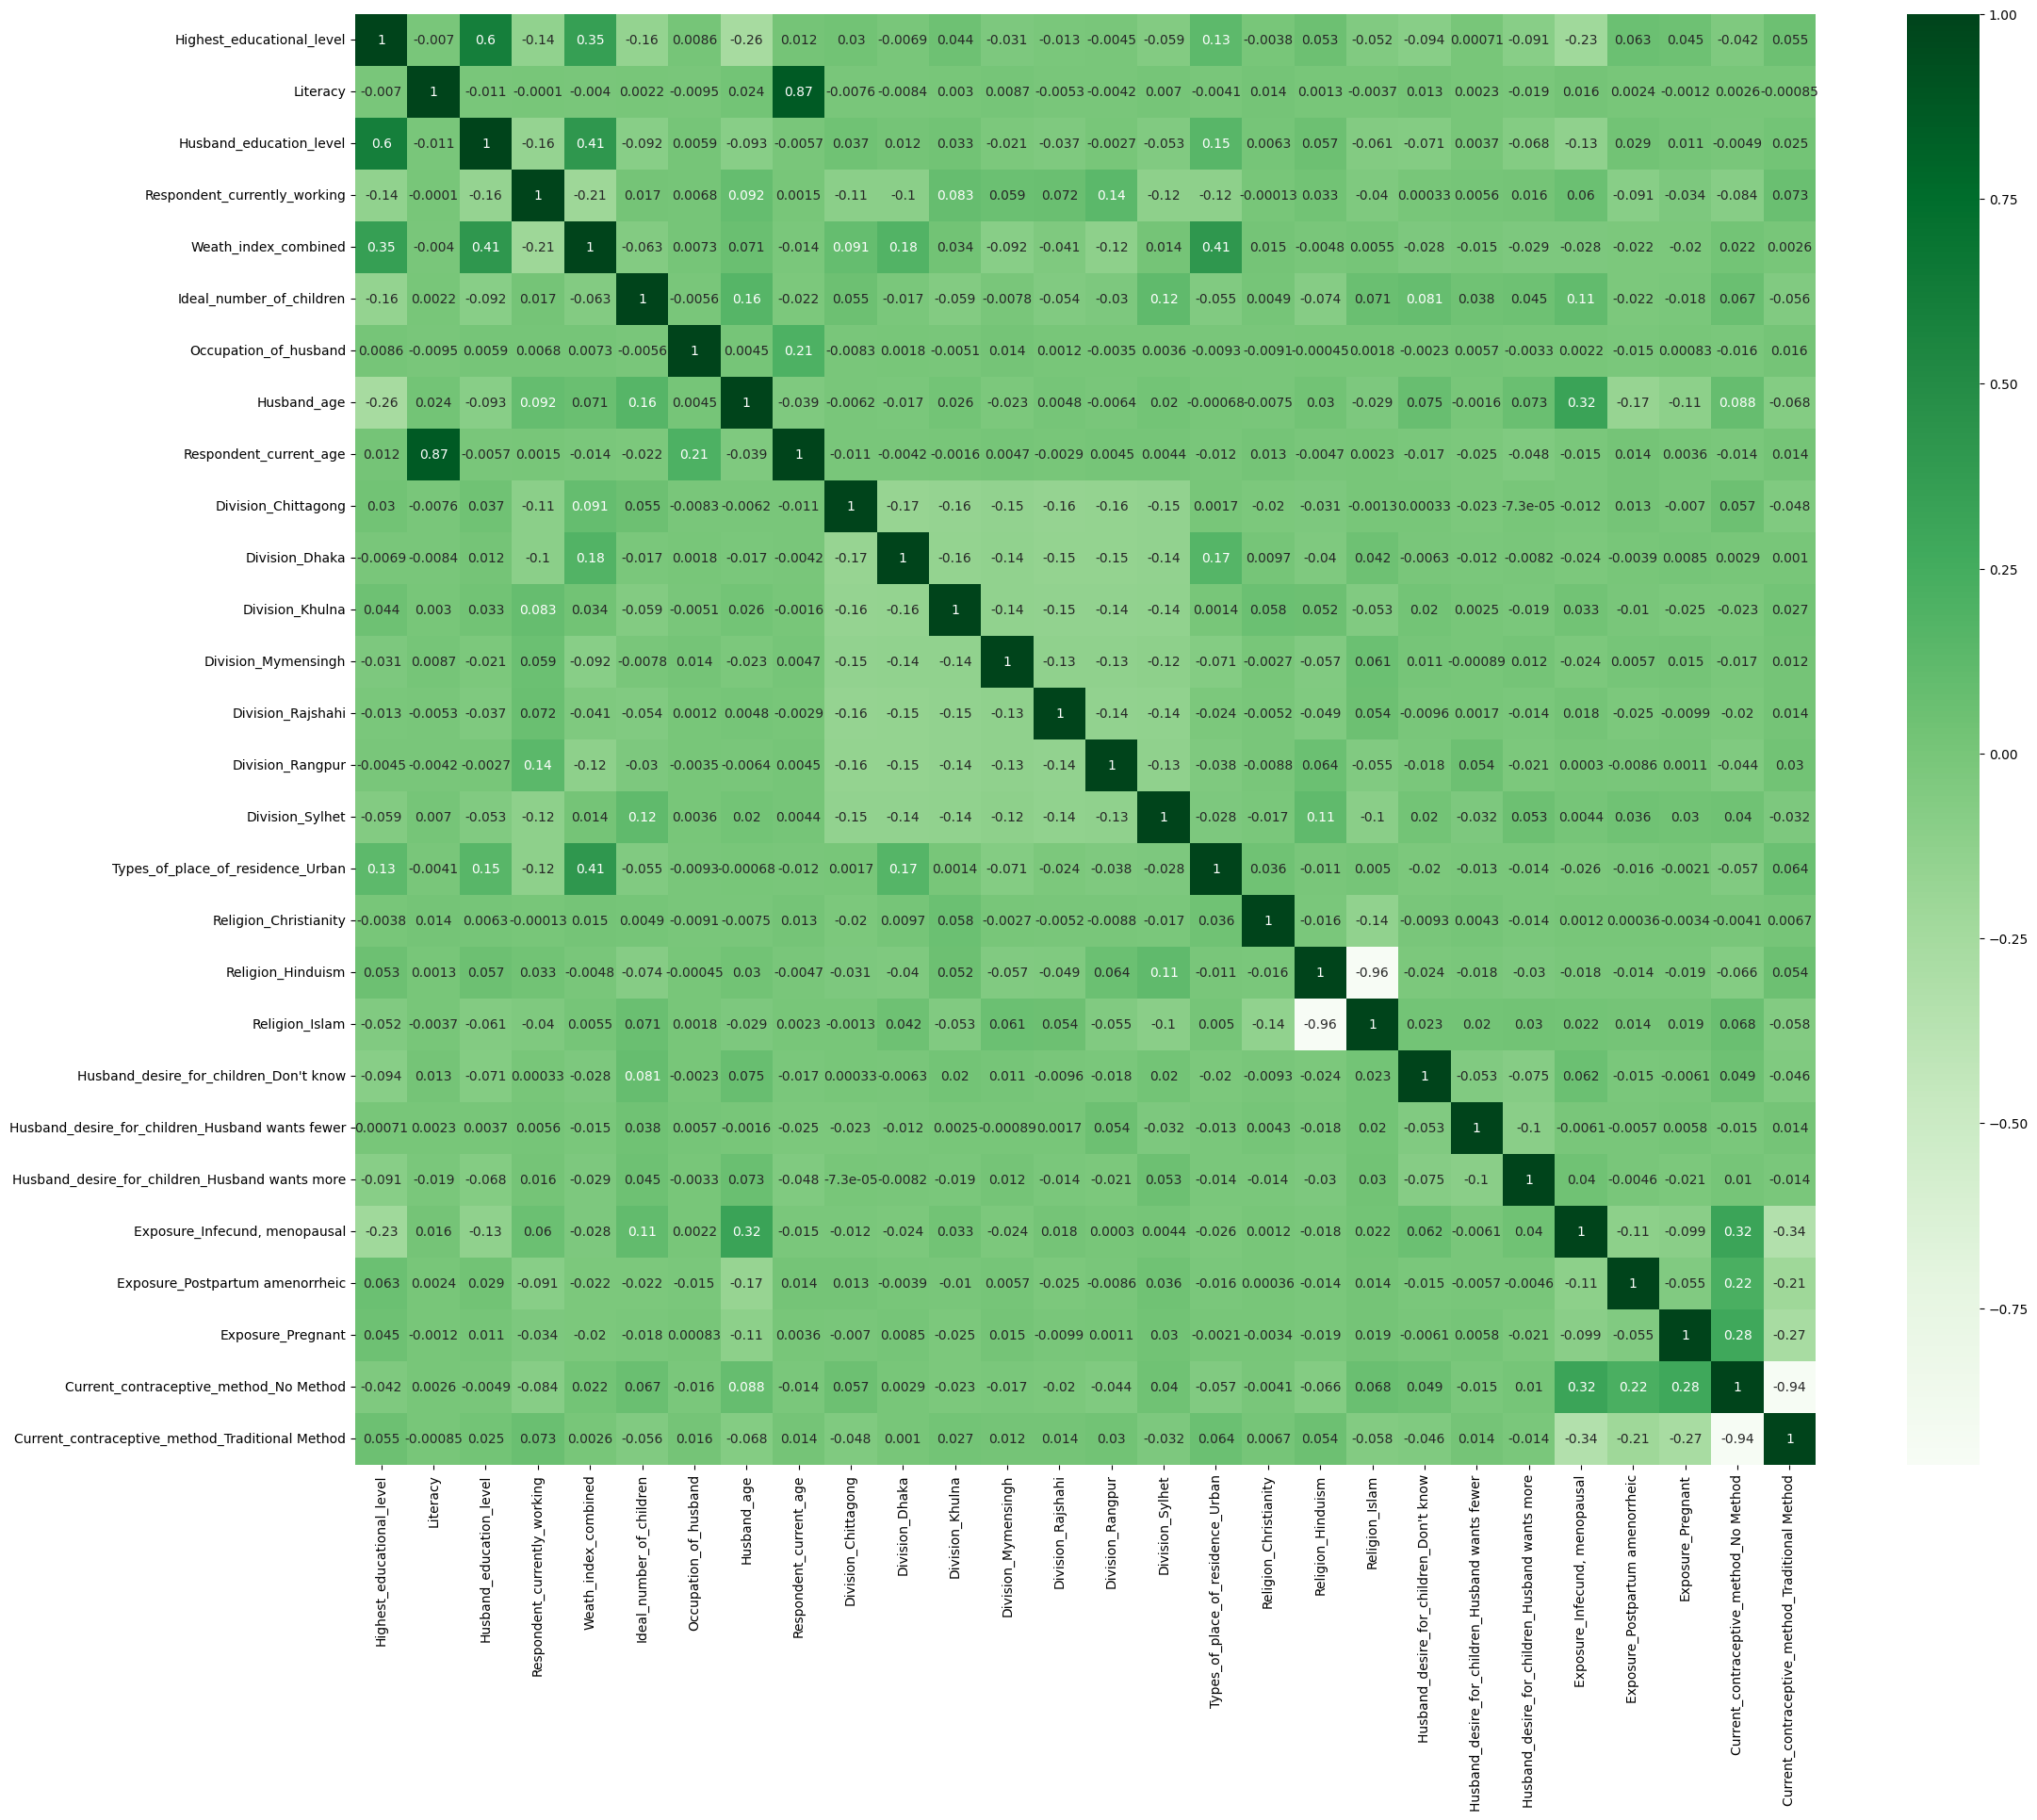

In [31]:
#Multicolinearity Test
plt.figure(figsize=(25,20))
sns.heatmap(X_Feature_Selection.corr(),cmap="Greens", annot=True)
sns.color_palette("Paired")

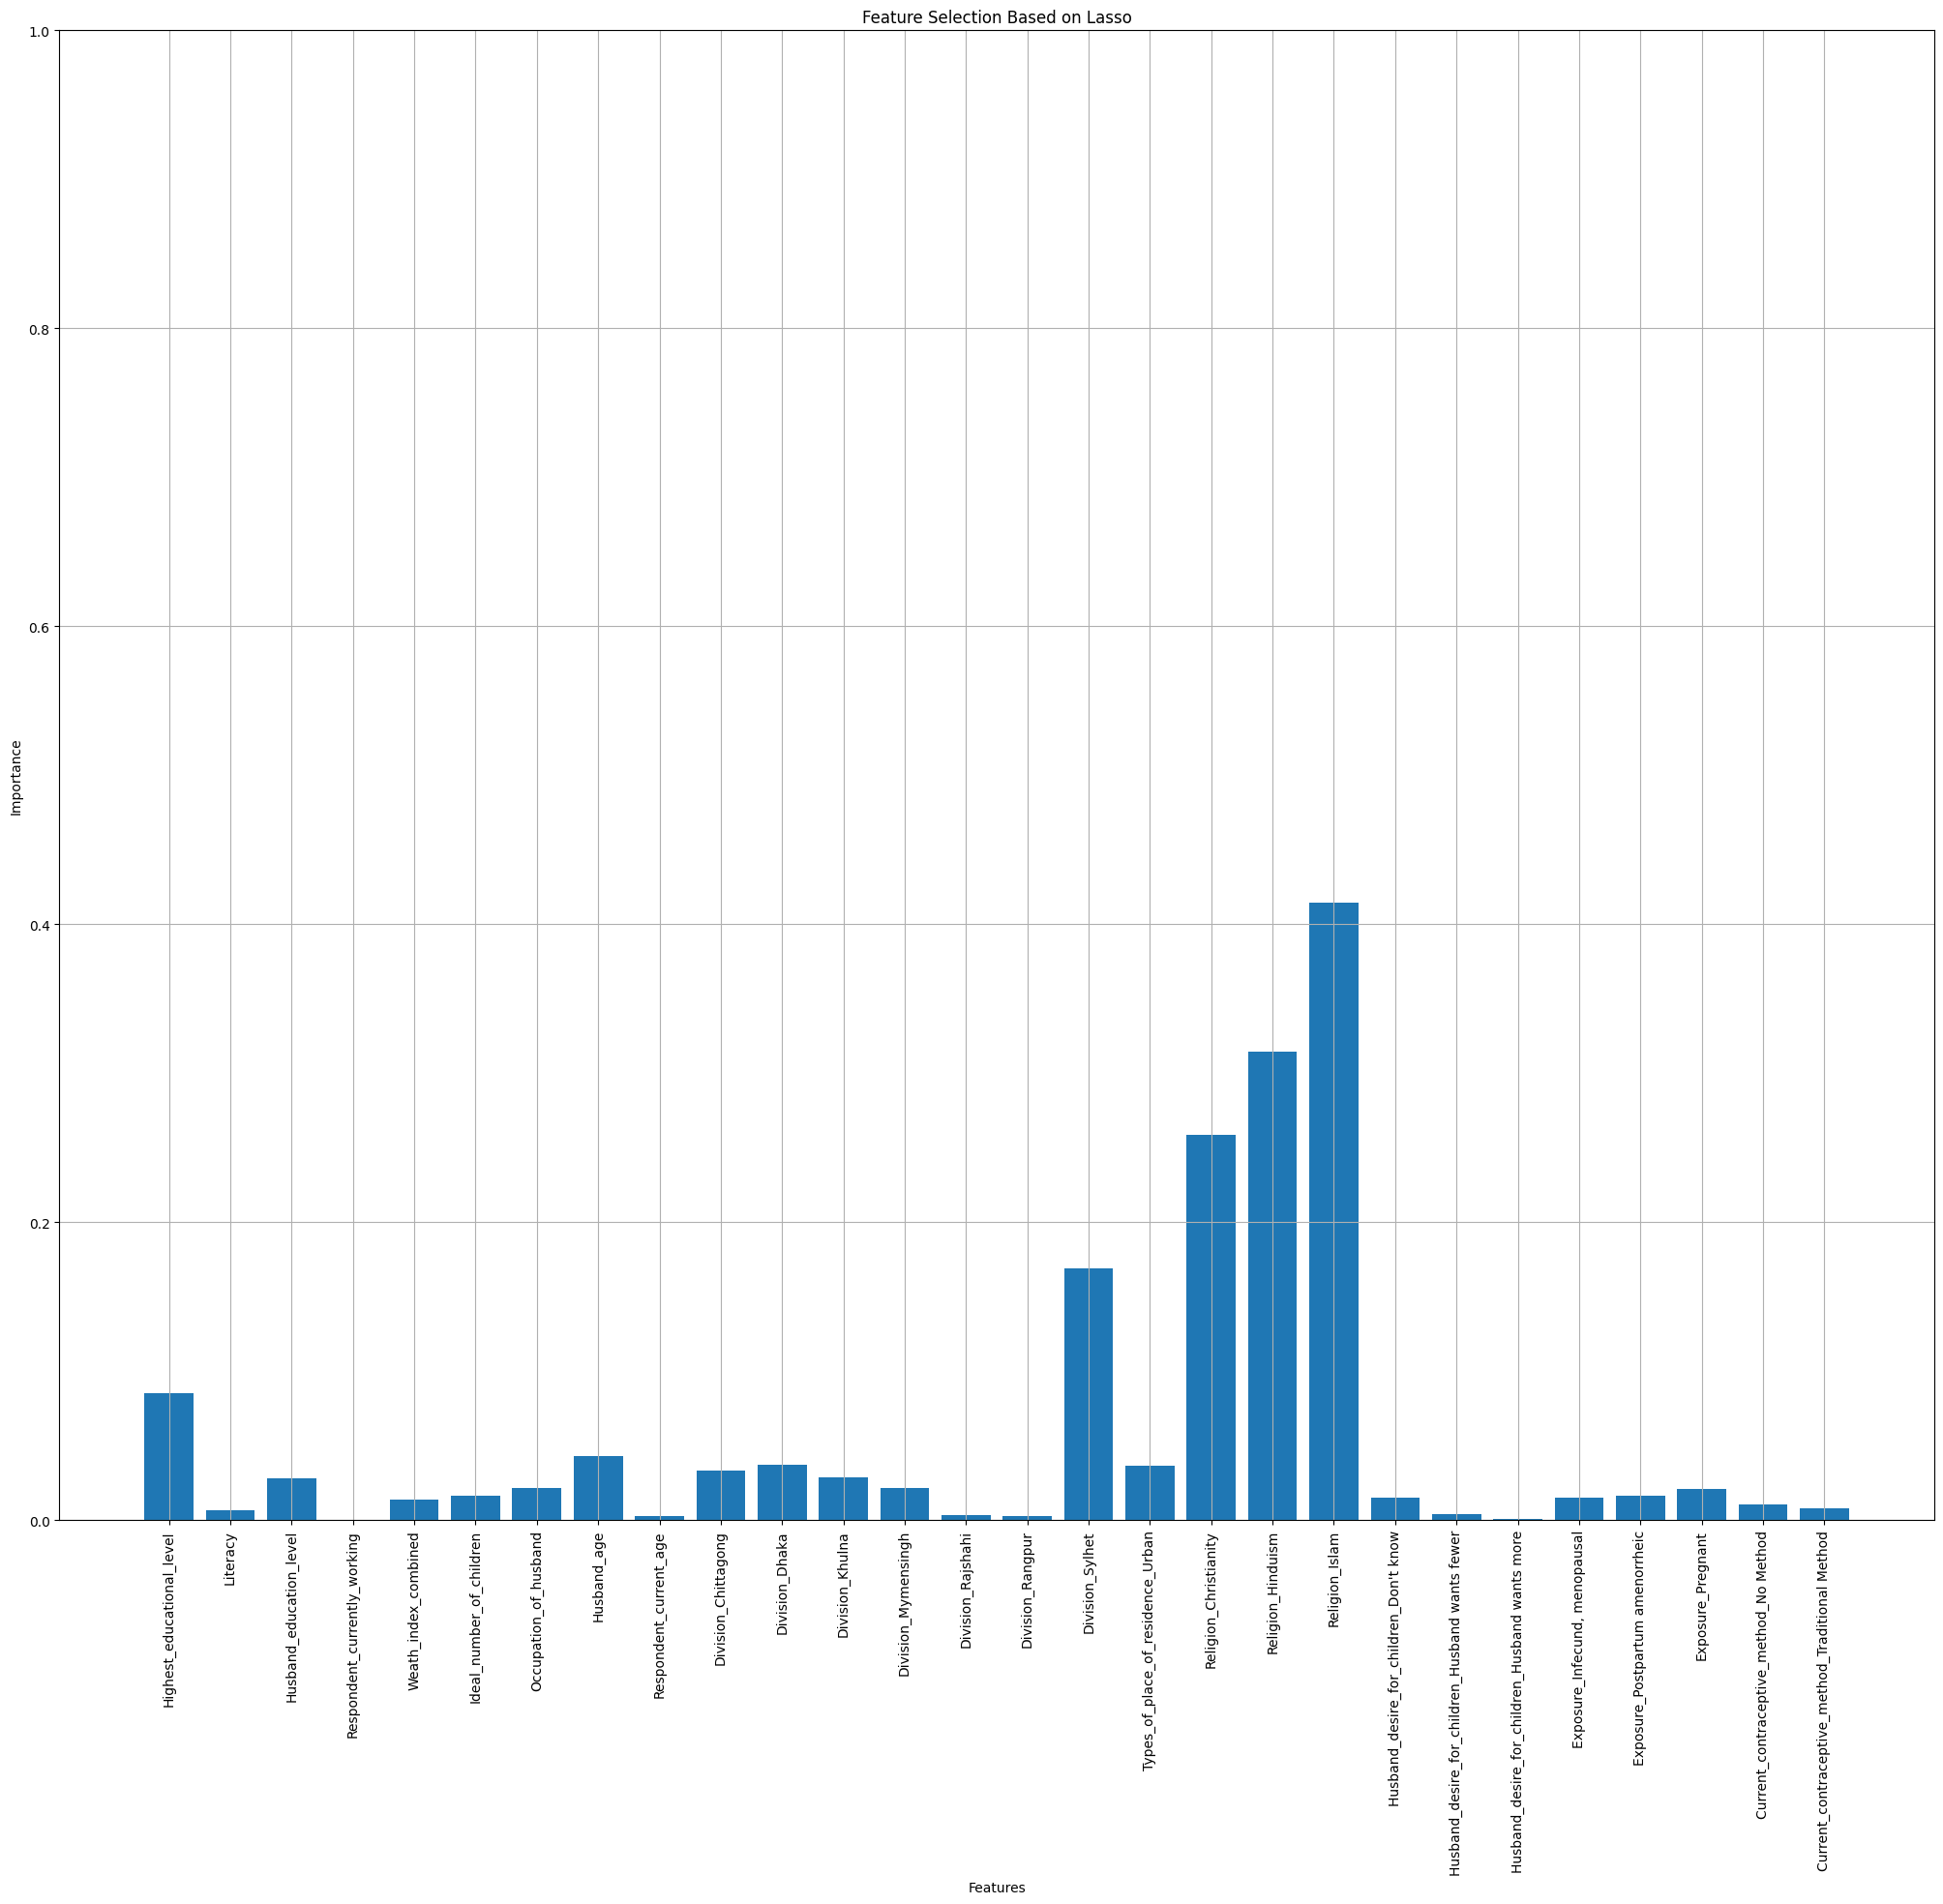

In [32]:
lasso1 = Lasso(alpha=0.00001)
lasso1.fit(X_train_Feature_Selection, y_train_Feature_Selection)

# Using np.abs() to make coefficients positive.
lasso1_coef = np.abs(lasso1.coef_)

# plotting the Column Names and Importance of Columns.
names=X_train_Feature_Selection.columns
plt.figure(figsize=(25,20))
plt.bar(names, lasso1_coef)
plt.xticks(rotation=90)
plt.grid()
plt.title("Feature Selection Based on Lasso")
plt.xlabel("Features")
plt.ylabel("Importance")
plt.ylim(0,1)
plt.show()

In [33]:
import os
os.getcwd()

'/content'

<img src ="Boruta Early Age Black phot.png">

# R studio Showing not identified features
Husband_desire_for_children,

Ideal_number_of_children,

Occupation_of_husband,

Respondent_currently_working,

In [34]:
chi_scores = chi2(X_train_Feature_Selection, y_train_Feature_Selection)
chi_scores

(array([4.15554918e+02, 9.94101140e-03, 2.48924616e+02, 3.38415176e+01,
        4.04012310e+02, 1.19149277e+01, 7.89645914e-01, 4.08199049e-01,
        8.30069106e-02, 8.20988172e+00, 4.81128402e+00, 1.68013452e+01,
        7.34002366e+00, 2.15607727e+01, 1.44378881e+01, 1.67087073e+02,
        8.11697125e+01, 1.97614788e+00, 1.12996611e+02, 1.80198853e+01,
        2.14568340e+00, 8.17838990e-01, 3.94781281e+00, 3.43458505e+01,
        3.93696436e+00, 3.55027525e+00, 2.01397504e-03, 4.27266175e-01]),
 array([2.26455591e-92, 9.20578832e-01, 4.45538362e-56, 5.97892063e-09,
        7.37082082e-90, 5.56858992e-04, 3.74207215e-01, 5.22885015e-01,
        7.73263151e-01, 4.16628669e-03, 2.82739704e-02, 4.15038714e-05,
        6.74359517e-03, 3.42791772e-06, 1.44858430e-04, 3.20191908e-38,
        2.07142423e-19, 1.59796809e-01, 2.16143941e-26, 2.18609457e-05,
        1.42971360e-01, 3.65812753e-01, 4.69323304e-02, 4.61383019e-09,
        4.72359434e-02, 5.95355735e-02, 9.64205084e-01, 5.1333

In [35]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14692 entries, 0 to 15941
Data columns (total 16 columns):
 #   Column                        Non-Null Count  Dtype   
---  ------                        --------------  -----   
 0   Respondent_current_age        14692 non-null  category
 1   Division                      14692 non-null  category
 2   Types_of_place_of_residence   14692 non-null  category
 3   Highest_educational_level     14692 non-null  category
 4   Religion                      14692 non-null  category
 5   Literacy                      14692 non-null  category
 6   Husband_desire_for_children   14692 non-null  category
 7   Exposure                      14692 non-null  category
 8   Husband_education_level       14692 non-null  category
 9   Respondent_currently_working  14692 non-null  category
 10  Weath_index_combined          14692 non-null  category
 11  Age_at_first_birth            14692 non-null  category
 12  Current_contraceptive_method  14692 non-null  

<Axes: >

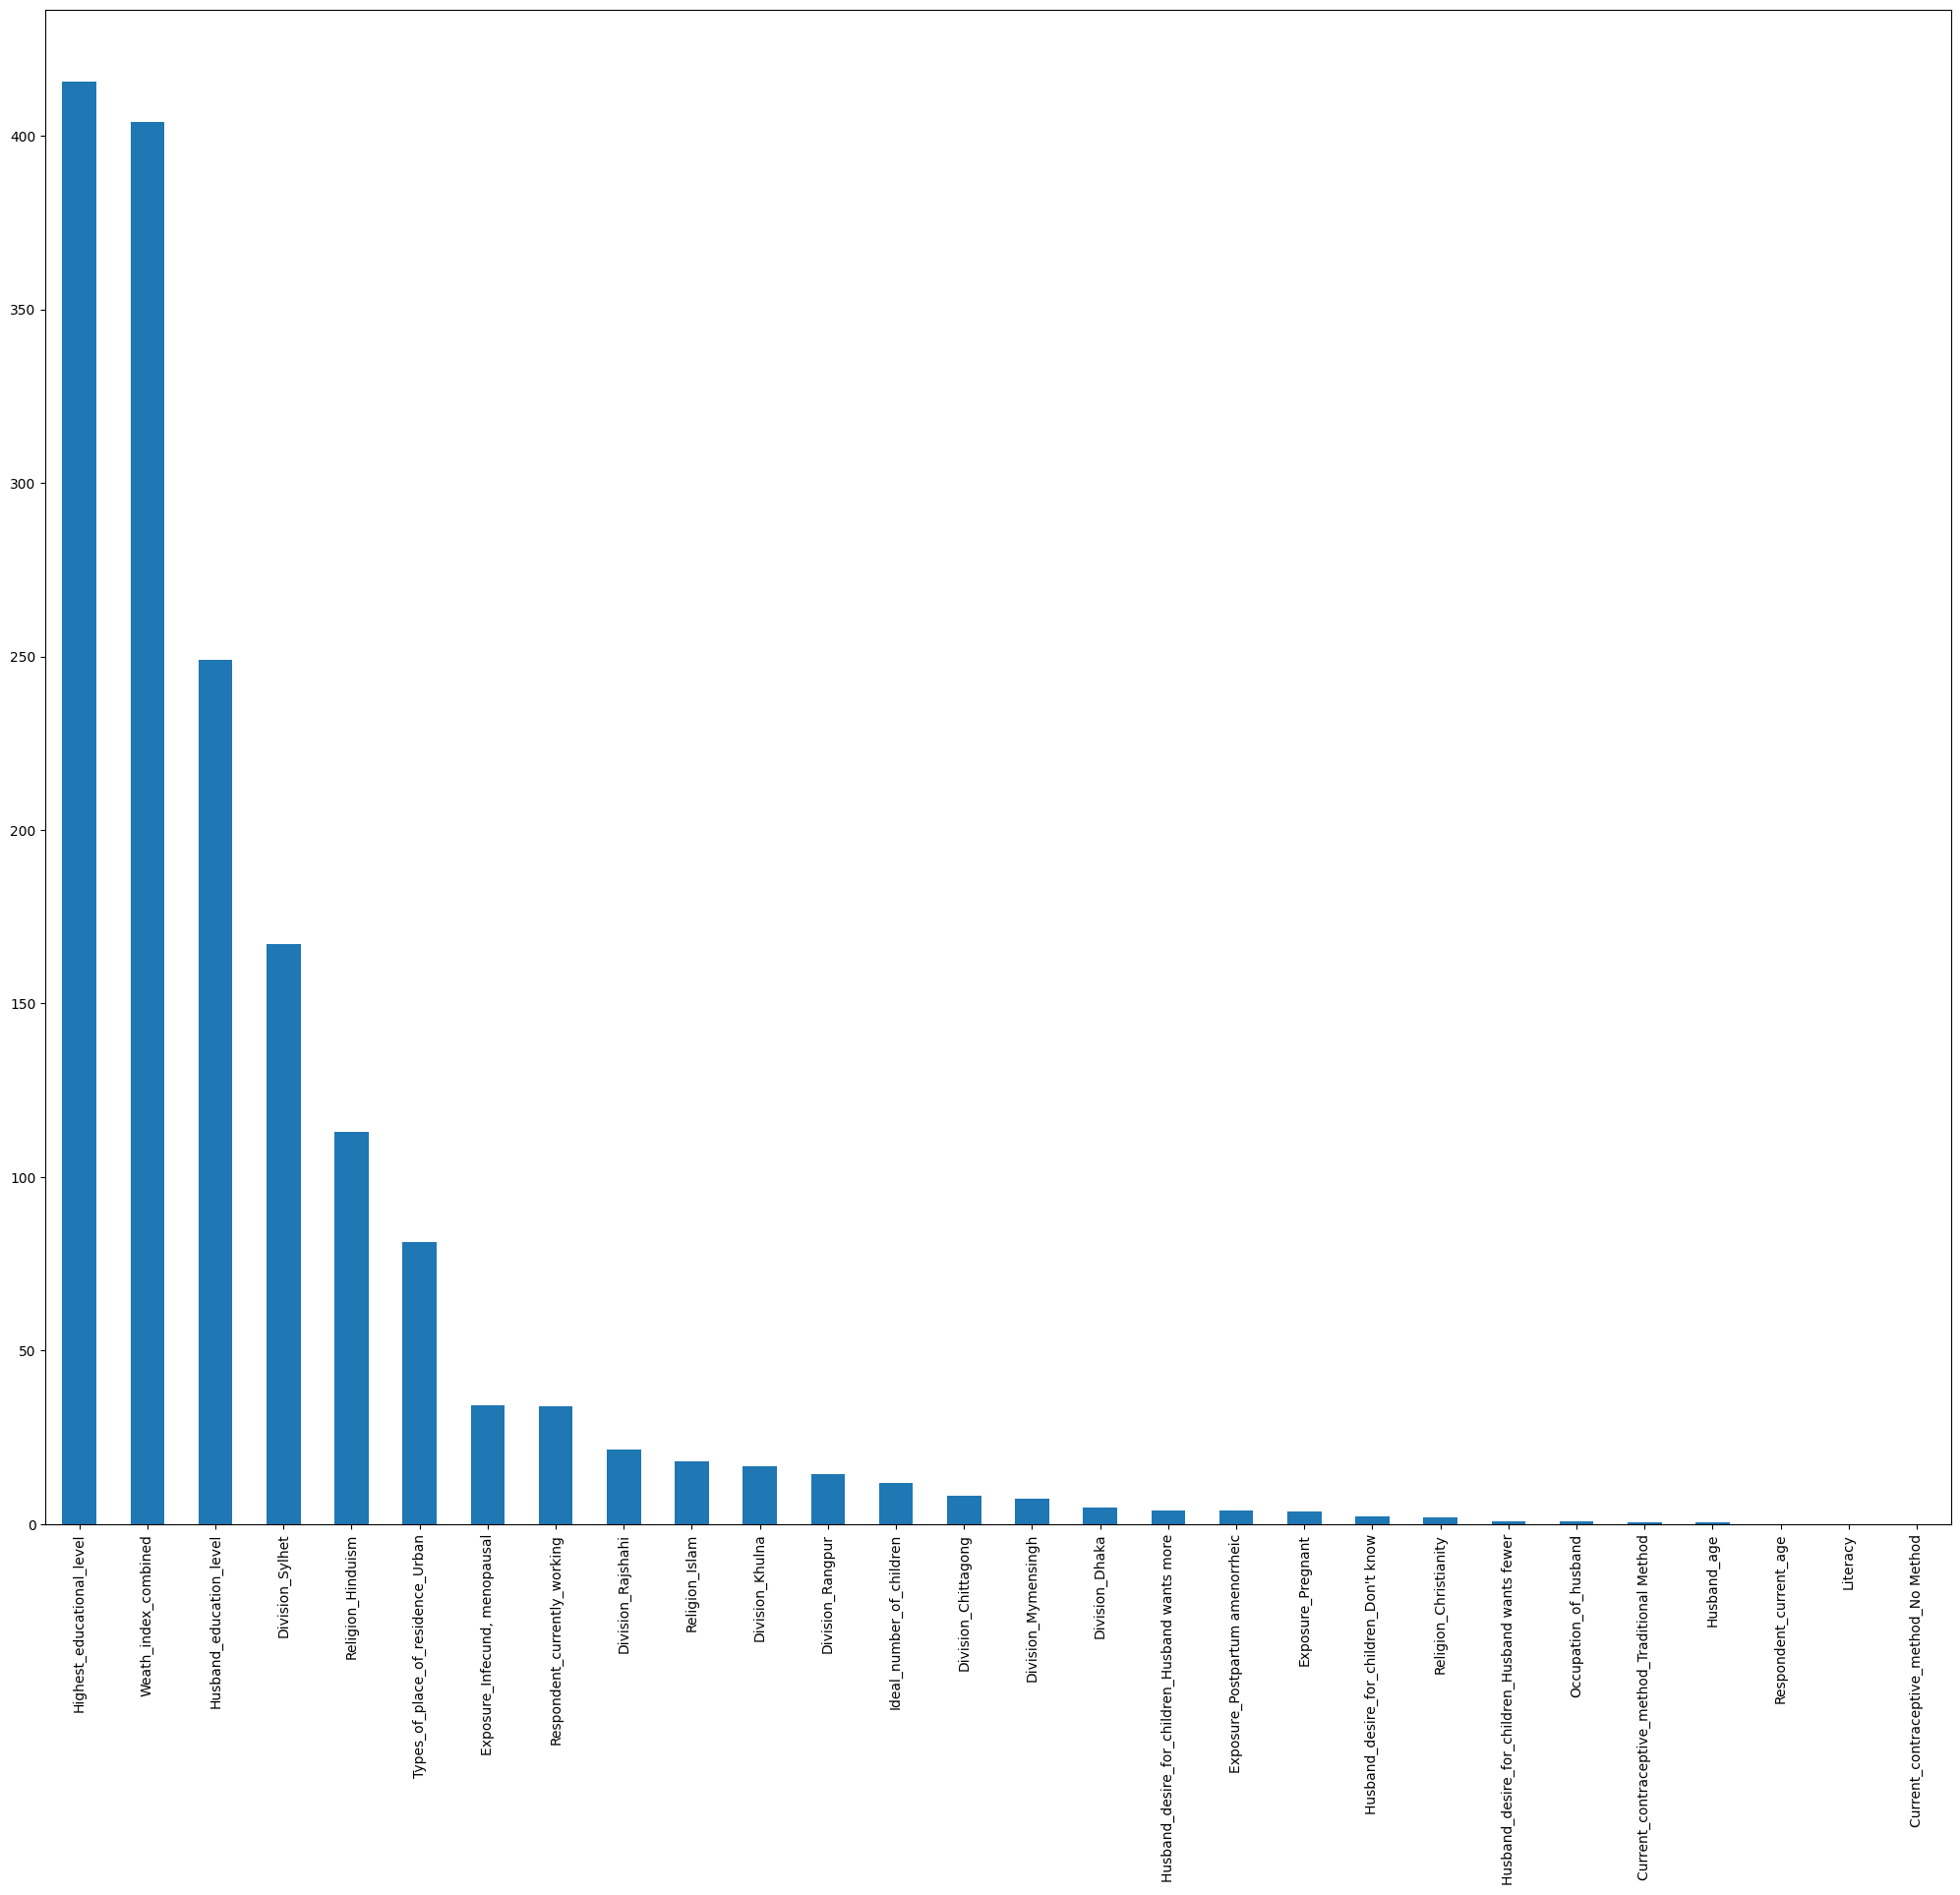

In [36]:
# Higher the chi value, higher the importance
plt.figure(figsize=(25,20))
chi_values = pd.Series(chi_scores[0], index=X_train_Feature_Selection.columns)
chi_values.sort_values(ascending=False, inplace=True)
chi_values.plot.bar()

<Axes: >

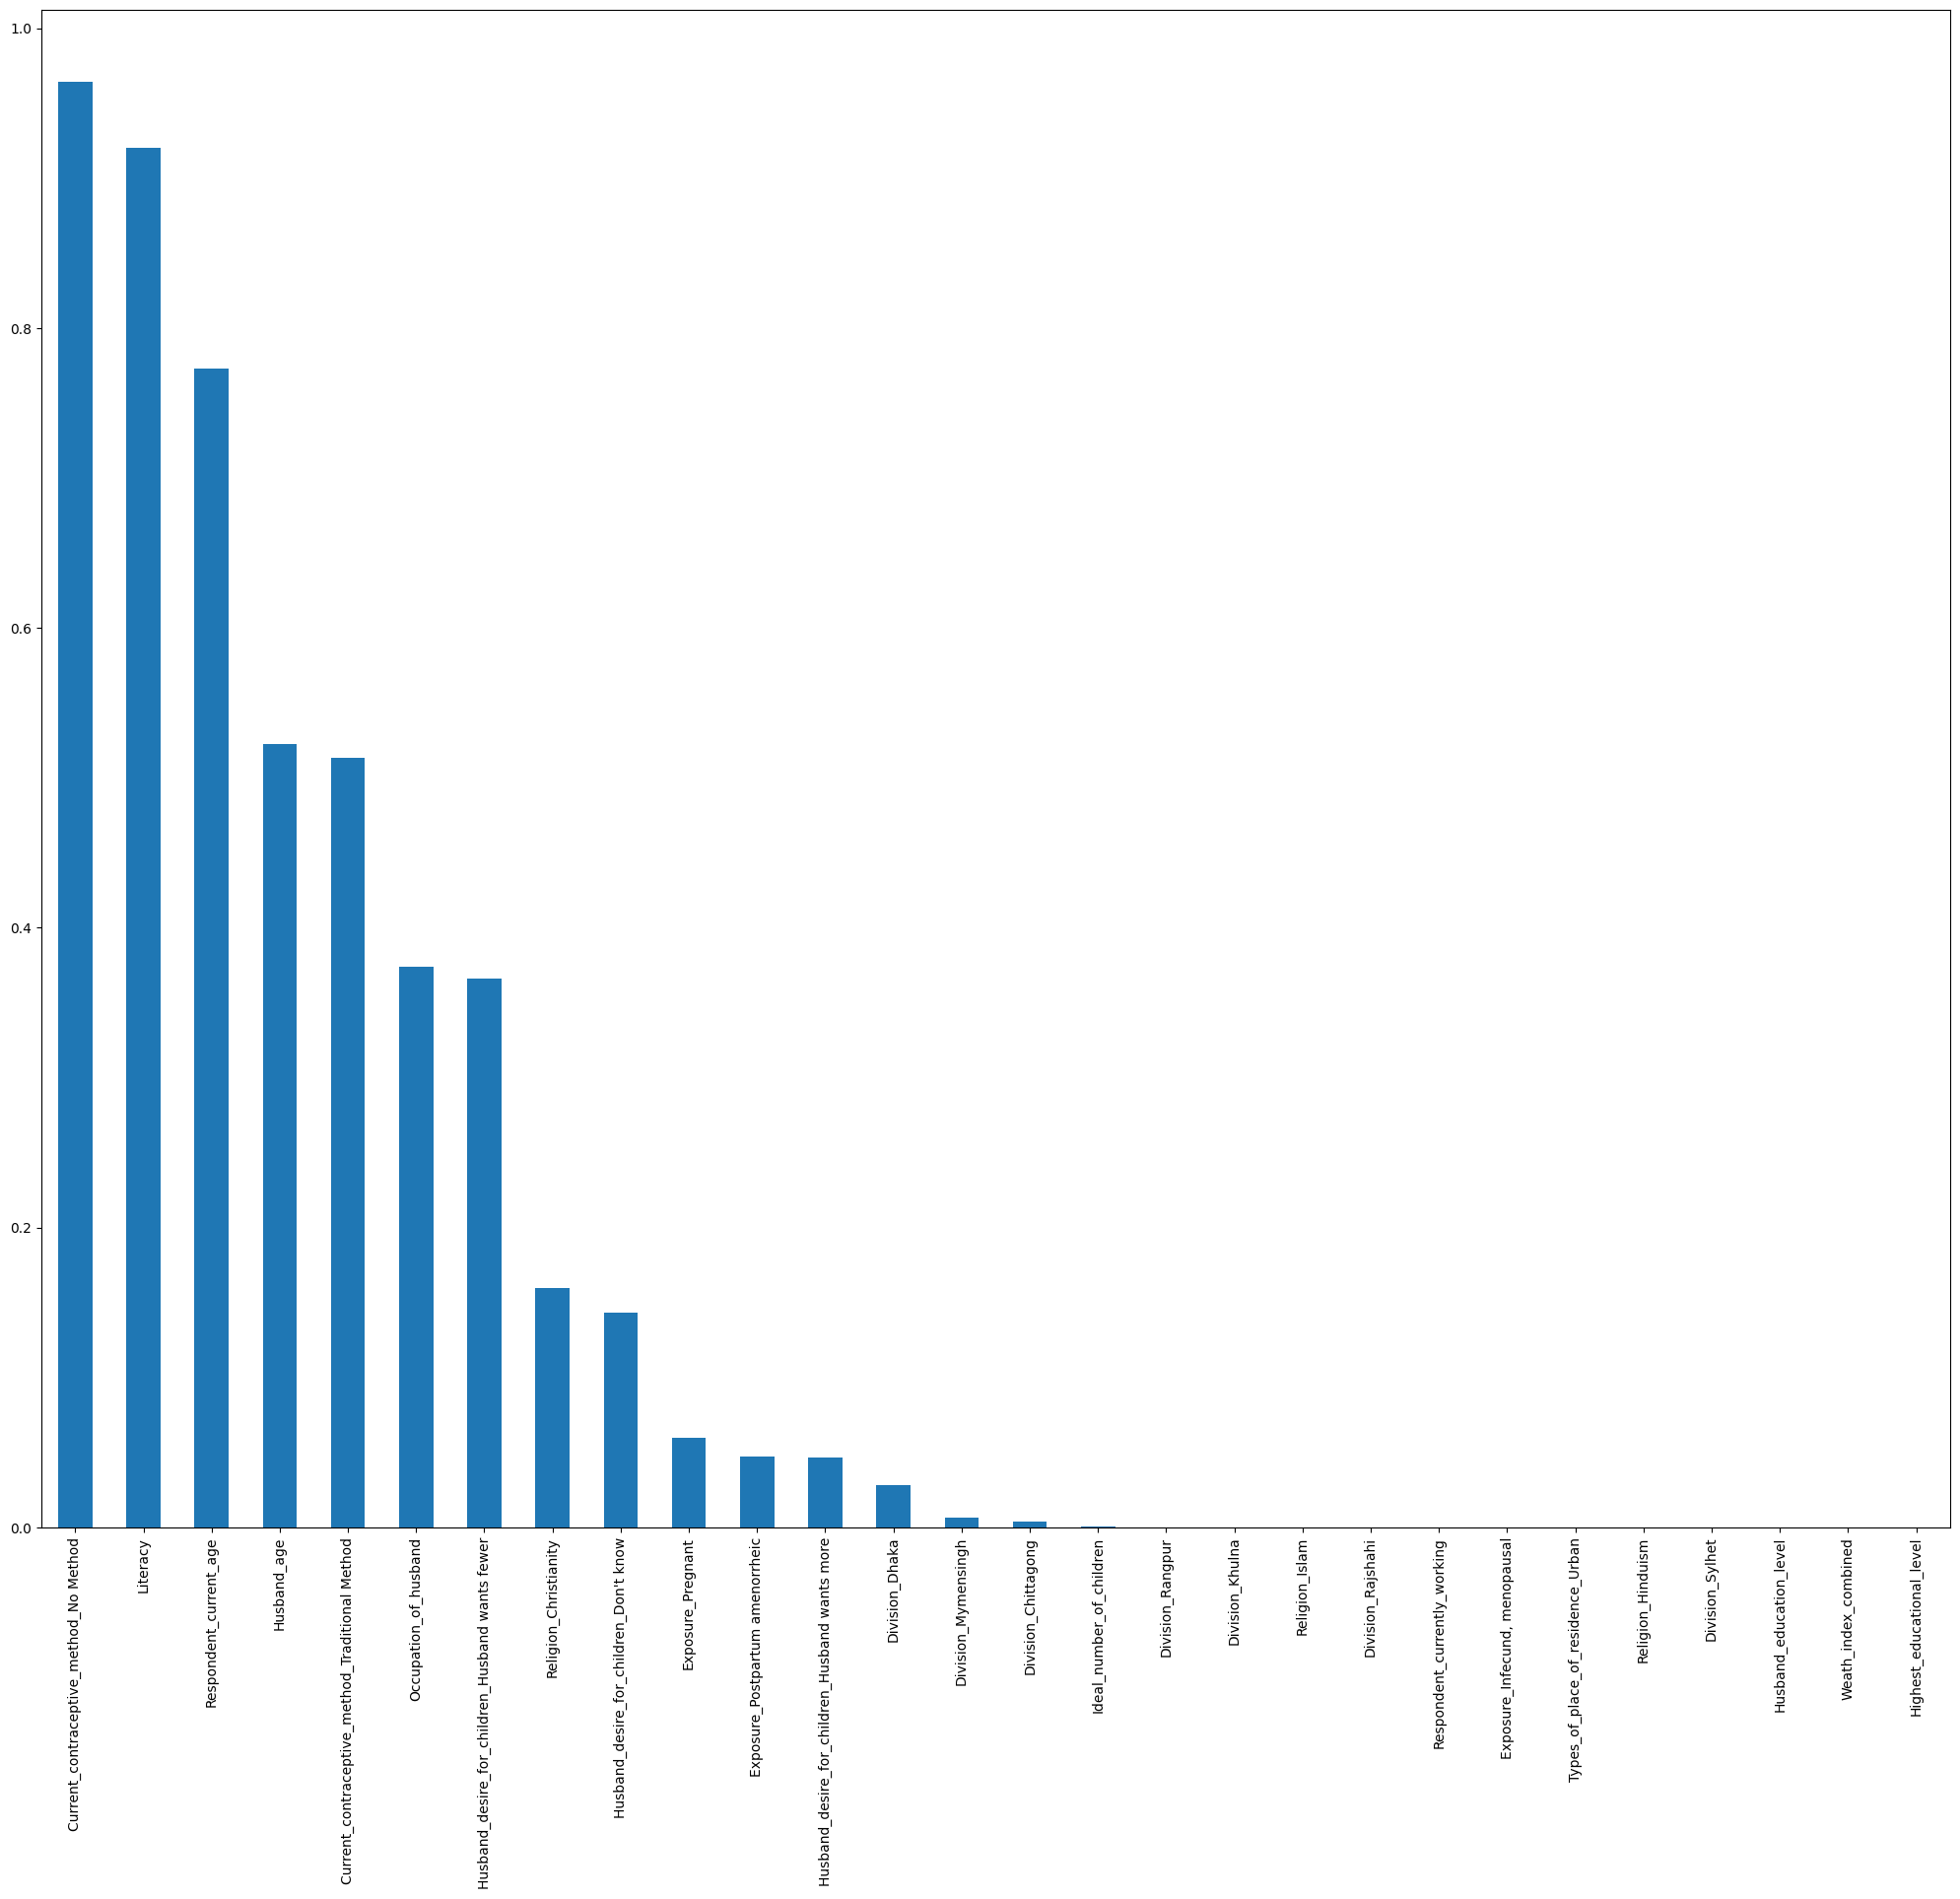

In [37]:
# if p-value > 0.5, lower the importance
plt.figure(figsize=(25,20))
p_values = pd.Series(chi_scores[1], index=X_train_Feature_Selection.columns)
p_values.sort_values(ascending=False, inplace=True)
p_values.plot.bar()

# Wrraper Method

# Forward selection

In [34]:
total_X.head()

,Highest_educational_level,Literacy,Husband_education_level,Respondent_currently_working,Weath_index_combined,Ideal_number_of_children,Occupation_of_husband,Husband_age,Respondent_current_age,Division_Chittagong,...,Religion_Hinduism,Religion_Islam,Husband_desire_for_children_Don't know,Husband_desire_for_children_Husband wants fewer,Husband_desire_for_children_Husband wants more,"Exposure_Infecund, menopausal",Exposure_Postpartum amenorrheic,Exposure_Pregnant,Current_contraceptive_method_No Method,Current_contraceptive_method_Traditional Method
11459,1.0,2.0,2.0,0.0,3.0,0.0,0.0,1.0,5.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
13156,2.0,2.0,4.0,1.0,2.0,0.0,0.0,2.0,5.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
771,2.0,0.0,2.0,1.0,4.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
8249,1.0,2.0,2.0,1.0,1.0,1.0,0.0,1.0,4.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3828,2.0,0.0,2.0,1.0,0.0,0.0,1.0,1.0,2.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0


# Wrapper Forward Methods

In [38]:
X_train, X_test, y_train, y_test = train_test_split(total_X, total_y, test_size=0.2, random_state=1)

print(X_train.shape)

(11753, 28)


# Ensumble Models

# Random forest

In [39]:
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()

# perform backward elimination
sfs =SFS(model, k_features='best',forward=True, floating=False, scoring='accuracy',cv=2)

sfs.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed whe

SequentialFeatureSelector(cv=2, estimator=RandomForestClassifier(),
                          k_features=(1, 28), scoring='accuracy')

In [40]:
sfs.k_feature_idx_

(0, 4, 7, 16)

# XG BOOST

In [38]:
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from xgboost import XGBClassifier
model_xg = XGBClassifier()

# perform backward elimination
sfs = SFS(model_xg, k_features='best', forward=True, floating=False, scoring='accuracy',cv=2)

sfs.fit(X_train, y_train)

SequentialFeatureSelector(cv=2,
                          estimator=XGBClassifier(base_score=None, booster=None,
                                                  callbacks=None,
                                                  colsample_bylevel=None,
                                                  colsample_bynode=None,
                                                  colsample_bytree=None,
                                                  device=None,
                                                  early_stopping_rounds=None,
                                                  enable_categorical=False,
                                                  eval_metric=None,
                                                  feature_types=None,
                                                  gamma=None, grow_policy=None,
                                                  importance_type=None,
                                                  interaction_constraints=None,
                                                  learning_rate=None,
                                                  max_bin=None,
                                                  max_cat_threshold=None,
                                                  max_cat_to_onehot=None,
                                                  max_delta_step=None,
                                                  max_depth=None,
                                                  max_leaves=None,
                                                  min_child_weight=None,
                                                  missing=nan,
                                                  monotone_constraints=None,
                                                  multi_strategy=None,
                                                  n_estimators=None,
                                                  n_jobs=None,
                                                  num_parallel_tree=None,
                                                  random_state=None, ...),
                          k_features=(1, 28), scoring='accuracy')

In [39]:
sfs.k_feature_idx_

(0, 4, 15, 16, 17, 21, 25)

# ADABoost

In [ ]:
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from sklearn.ensemble import AdaBoostClassifier
abc = AdaBoostClassifier(n_estimators=1500,learning_rate=0.1)

model_abc = SFS(abc, k_features='best', forward=True, floating=False, scoring='accuracy',cv=2)

model_abc.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for exam

In [ ]:
model_adaboost.k_feature_idx_

# Wrapper forward for Non Ensemble

# Decision Tree

In [ ]:
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from sklearn import tree
model_tree= tree.DecisionTreeClassifier()

model_tree_decision =SFS(model_tree, k_features='best', forward=True, floating=False, scoring='accuracy',cv=2)


model_tree_decision.fit(X_train, y_train)

In [ ]:
model_tree_decision.k_feature_idx_

# SVM

In [ ]:
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from sklearn.svm import SVC
svm_model = SVC(kernel="linear", probability=True)

model_svm =SFS(model_tree, k_features='best', forward=True, floating=False, scoring='accuracy',cv=2)


model_svm.fit(X_train, y_train)

In [ ]:
model_svm.k_feature_idx_

# Naive Bayes

In [ ]:
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from sklearn.naive_bayes import GaussianNB, MultinomialNB ,BernoulliNB
NB_model=BernoulliNB()


model_NB =SFS(NB_model, k_features='best', forward=True, floating=False, scoring='accuracy',cv=2)


model_NB.fit(X_train, y_train)

In [ ]:
model_naive_bayes.k_feature_idx_

# Implemeting Machine Learning Models

# Non Ensemble

# Decision Tree

In [4]:
x_train,x_test,y_train,y_test=train_test_split(total_X,total_y,test_size=0.3,random_state=0)

NameError: name 'train_test_split' is not defined

In [ ]:
from sklearn import tree
model= tree.DecisionTreeClassifier() #Making a obj called Model
model.fit(x_train,y_train)
pred_y_DT= model.predict(X_test_ML)
print("Accuracy:",metrics.accuracy_score(y_test, pred_y_DT))

# SVM

# Ravel used for convert array
y_test_ML.values.ravel()

In [ ]:
from sklearn.svm import SVC
svm_model = SVC(kernel="linear", probability=True)

svm_model.fit(X_train_ML, y_train_ML)

# Multinomial CLassifier
# Predict the test set results
pred_y_svm= svm_model.predict(X_test_ML)
print("Normal accuracy: ", accuracy_score(y_test_ML, pred_y_svm))
print(classification_report(y_test_ML.values.ravel(),pred_y_svm))

In [ ]:
#Cohen Kappa Score's
from sklearn.metrics import cohen_kappa_score
cohen_kappa_score(y_test_ML['Age at Early Marrige'],pred_y_svm)

In [ ]:
print(pd.crosstab(y_test_ML.values.ravel(), pred_y_svm))

In [ ]:
import numpy as np
from scipy import stats

z_value = stats.norm.ppf(1 - 0.05 / 2)
acc_test = svm_model.score(X_test_ML, y_test_ML['Age at Early Marrige'])
ci_length = z_value * np.sqrt((acc_test * (1 - acc_test)) / y_test.shape[0])

ci_lower = acc_test - ci_length
ci_upper = acc_test + ci_length

print(ci_lower, ci_upper)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, roc_curve, auc, confusion_matrix
import numpy as np
import statsmodels.api as sm
from sklearn.metrics import cohen_kappa_score
from scipy import stats

# Compute precision
precision = precision_score(y_test_ML, pred_y_svm)
print("Precision:", precision)

# Compute recall
recall = recall_score(y_test_ML, pred_y_svm)
print("Recall:", recall)


# Make predictions on the test set
y_pred = svm_model.predict(X_test_ML)
y_pred_proba_log = svm_model.predict_proba(X_test_ML)[:, 1]
# Compute ROC curve
fpr, tpr, thresholds = roc_curve(y_test_ML, y_pred_proba_log)
roc_auc = auc(fpr, tpr)
print("ROC AUC Score:", roc_auc)

# Plot ROC curve
import matplotlib.pyplot as plt
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

# Naive Bayes

In [5]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB ,BernoulliNB
NB_model=BernoulliNB()

NB_model.fit(X_train_ML, y_train_ML)

# Multinomial CLassifier
# Predict the test set results
pred_y_Naive_bayes= NB_model.predict(X_test_ML)
print("Normal accuracy: ", accuracy_score(y_test_ML, pred_y_Naive_bayes))
print(classification_report(y_test_ML['Age at Early Marrige'],pred_y_Naive_bayes))
print(pd.crosstab(y_test_ML['Age at Early Marrige'], pred_y_Naive_bayes))

NameError: name 'X_train_ML' is not defined

In [ ]:
#Cohen Kappa Score's
from sklearn.metrics import cohen_kappa_score
cohen_kappa_score(y_test_ML['Age at Early Marrige'],pred_y_Naive_bayes)

In [ ]:
import numpy as np
from scipy import stats

z_value = stats.norm.ppf(1 - 0.05 / 2)
acc_test = NB_model.score(X_test_ML, y_test_ML['Age at Early Marrige'])
ci_length = z_value * np.sqrt((acc_test * (1 - acc_test)) / y_test.shape[0])

ci_lower = acc_test - ci_length
ci_upper = acc_test + ci_length

print(ci_lower, ci_upper)

In [ ]:
#Indetify the Value of N
#for i in range(1,21):
from sklearn.model_selection import cross_val_score
scores_Carrt=cross_val_score(NB_model,X_Feature_Selection, y_Feature_Selection["Age at Early Marrige"],cv=10,scoring='accuracy')
print(scores_Carrt.mean())

In [ ]:
#Indetify the Value of N
#for i in range(1,21):
from sklearn.model_selection import cross_val_score
scores_Carrt=cross_val_score(NB_model,X_Feature_Selection, y_Feature_Selection["Age at Early Marrige"],cv=10,scoring='f1')
print(scores_Carrt.mean())

# Roc curve Naive Bayes

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, roc_curve, auc, confusion_matrix
import numpy as np
import statsmodels.api as sm
from sklearn.metrics import cohen_kappa_score
from scipy import stats

# Compute precision
precision = precision_score(y_test_ML, pred_y_svm)
print("Precision:", precision)

# Compute recall
recall = recall_score(y_test_ML, pred_y_svm)
print("Recall:", recall)


# Make predictions on the test set
y_pred = NB_model.predict(X_test_ML)
y_pred_proba_log = NB_model.predict_proba(X_test_ML)[:, 1]
# Compute ROC curve
fpr, tpr, thresholds = roc_curve(y_test_ML, y_pred_proba_log)
roc_auc = auc(fpr, tpr)
print("ROC AUC Score:", roc_auc)

# Plot ROC curve
import matplotlib.pyplot as plt
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

# Ensumbel Method

# Random Forest

In [ ]:
X=total_X
y=total_y.values.ravel()
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=0)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
Rm_model = RandomForestClassifier(criterion='gini',
                              min_samples_leaf=200
                              )
# Fit the model
clf = Rm_model.fit(x_train, y_train)
# Predict class labels on a test data
y_pred_rm = Rm_model.predict(x_test)
print('*************** Evaluation on Test Data ***************')
score_te_rm = accuracy_score(y_test, y_pred_rm)
print('Accuracy Score: ', score_te_rm)

In [ ]:
y_test=pd.DataFrame(y_test)
y_pred_rm=pd.DataFrame(y_pred_rm)

In [ ]:
# Look at classification report to evaluate the model
print(classification_report(y_test, y_pred_rm))

In [ ]:
pd.crosstab(y_test.values,y_pred_rm.values)

In [ ]:
#Cross Validation
from sklearn.model_selection import cross_val_score
scores_Carrt=cross_val_score(Rm_model,X, y["Age at Early Marrige"],cv=10,scoring='accuracy')
print(scores_Carrt.mean())

# PCA DATA Adaboost

In [ ]:
#PCA
from sklearn.decomposition import PCA
pca= PCA(n_components=2)
pca.fit(total_X)

In [ ]:
x_pca=pca.transform(total_X)
X=x_pca
X

In [ ]:
plt.scatter(x_pca[:,0],x_pca[:,1],c=total_y.values)

In [ ]:
#PCA DATA

from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import cross_val_score

abc = AdaBoostClassifier()

np.mean(cross_val_score(abc,x_pca,y,scoring='accuracy',cv=10))

In [ ]:
abc.fit(X,y)

In [ ]:
def plot_decision_boundary(clf):
    plt.figure(figsize=(12, 8))
    x_range = np.linspace(X.min(), X.max(), 100)
    xx1, xx2 = np.meshgrid(x_range, x_range)
    y_hat = clf.predict(np.c_[xx1.ravel(), xx2.ravel()])
    y_hat = y_hat.reshape(xx1.shape)
    plt.contourf(xx1, xx2, y_hat, alpha=0.2)
    plt.scatter(X[:,0], X[:,1], c=y, cmap='viridis', alpha=.7)
    plt.title("Adaboost Classifier")
    plt.show()

plot_decision_boundary(abc)

In [ ]:
abc = AdaBoostClassifier(n_estimators=1500,learning_rate=0.1)
abc.fit(X,y)
plot_decision_boundary(abc)

# Normal Data ADABOOST

In [ ]:
X=total_X
y=total_y.values.ravel()

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import cross_val_score

abc = AdaBoostClassifier()

np.mean(cross_val_score(abc,X,y,scoring='accuracy',cv=10))

In [ ]:
abc.fit(X,y)

In [ ]:
from sklearn.model_selection import GridSearchCV

grid = dict()
grid['n_estimators'] = [10, 50, 100, 500]
grid['learning_rate'] = [0.0001, 0.001, 0.01, 0.1, 1.0]
grid['algorithm'] = ['SAMME', 'SAMME.R']


grid_search = GridSearchCV(estimator=abc, param_grid=grid, n_jobs=-1, cv=10, scoring='accuracy')
# execute the grid search
grid_result = grid_search.fit(X, y)
# summarize the best score and configuration
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

# XGBOOST

In [ ]:
X=total_X
y=total_y.values.ravel()
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=0)

In [ ]:
from xgboost import XGBClassifier
model = XGBClassifier()
result= model.fit(X,y)
y_predict=model.predict(x_test)
y_train_predict=model.predict(x_train)
print("Train accuracy", accuracy_score(y_train,y_train_predict))
print("Tesr accuracy", accuracy_score(y_test,y_predict))